In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['clientnum', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1',
       'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2'],
      dtype='object')

In [4]:
df = df.drop(columns = ['naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1', 'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2'])

In [5]:
df.columns

Index(['clientnum', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

#Encoding

1. **Ordinal encoding**

In [7]:
income_map = {
    'Unknown':0,
    'Less than $40K' : 1,
    '$40K - $60K':2,
    '$60K - $80K':3,
    '$80K - $120K':4,
    '$120K +':5
}

df['income_category'] = df['income_category'].replace(income_map)

/tmp/ipython-input-2844679431.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income_category'] = df['income_category'].replace(income_map)


In [8]:
education_map = {
    'Unknown':0,
    'Uneducated':1,
    'High School':2,
    'College':3,
    'Graduate':4,
    'Post-Graduate':5,
    'Doctorate':6
}
df['education_level'] = df['education_level'].replace(education_map)

/tmp/ipython-input-4281327474.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education_level'] = df['education_level'].replace(education_map)


2. **Label encoding**

In [9]:
df['gender'] = df['gender'].replace({'M':0,'F':1})

/tmp/ipython-input-1025068498.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'M':0,'F':1})


In [10]:
df['attrition_flag'] = df['attrition_flag'].replace({'Attrited Customer':1, 'Existing Customer':0})

/tmp/ipython-input-1908715125.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['attrition_flag'] = df['attrition_flag'].replace({'Attrited Customer':1, 'Existing Customer':0})


3.**One hot encoding**

In [11]:
df = pd.get_dummies(df,columns=['marital_status','card_category'],drop_first=True, dtype = int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  int64  
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  int64  
 6   income_category           10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  contacts_count_12_mon     10127 non-null  int64  
 11  credit_limit              10127 non-null  float64
 12  total_revolving_bal       10127 non-null  int64  
 13  avg_open_to_buy           10127 non-null  float64
 14  total_

#Standardization

In [13]:
from sklearn.preprocessing import StandardScaler

scale_cols = [
    'customer_age',
    'months_on_book',
    'credit_limit',
    'total_revolving_bal',
    'avg_open_to_buy',
    'total_amt_chng_q4_q1',
    'total_trans_amt',
    'total_trans_ct',
    'total_ct_chng_q4_q1'
]

scaler = StandardScaler()

df[scale_cols] = scaler.fit_transform(df[scale_cols])
df.head()


,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,income_category,months_on_book,total_relationship_count,months_inactive_12_mon,...,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown,card_category_Gold,card_category_Platinum,card_category_Silver
0,768805383,0,-0.165406,0,3,2,3,0.384621,5,1,...,-0.959707,-0.973895,3.834003,0.061,1,0,0,0,0,0
1,818770008,0,0.333570,1,5,4,1,1.010715,6,1,...,-0.916433,-1.357340,12.608573,0.105,0,1,0,0,0,0
2,713982108,0,0.583058,0,3,4,4,0.008965,4,1,...,-0.740982,-1.911206,6.807864,0.000,1,0,0,0,0,0
3,769911858,0,-0.789126,1,4,2,1,-0.241473,3,4,...,-0.951758,-1.911206,6.807864,0.760,0,0,1,0,0,0
4,709106358,0,-0.789126,0,3,1,3,-1.869317,5,1,...,-1.056263,-1.570365,7.509325,0.000,1,0,0,0,0,0


#Checking imbalance

In [14]:
df['attrition_flag'].value_counts(normalize=True)*100

,proportion
attrition_flag,
0,83.934038
1,16.065962


#Predictive modelling

1. **Train test split**

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['attrition_flag'])
y = df['attrition_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

2. **Logistic regression**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression with class balancing
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1701    0]
 [ 325    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1701
           1       0.00      0.00      0.00       325

    accuracy                           0.84      2026
   macro avg       0.42      0.50      0.46      2026
weighted avg       0.70      0.84      0.77      2026



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3. **Random forest**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1686   15]
 [  92  233]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1701
           1       0.94      0.72      0.81       325

    accuracy                           0.95      2026
   macro avg       0.94      0.85      0.89      2026
weighted avg       0.95      0.95      0.94      2026



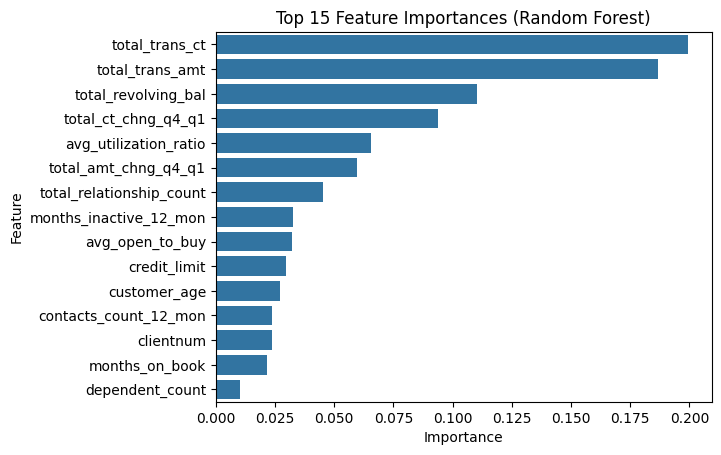

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
importances = rf.feature_importances_
features = X_train.columns
feat_importances = pd.DataFrame({"Feature": features, "Importance": importances})
feat_importances = feat_importances.sort_values(by="Importance", ascending=False)
sns.barplot(x="Importance", y="Feature", data=feat_importances.head(15))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.savefig("random_forest.png", dpi=300, bbox_inches="tight")
plt.show()

/tmp/ipython-input-230502242.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importances.head(5), palette = custom_colors)


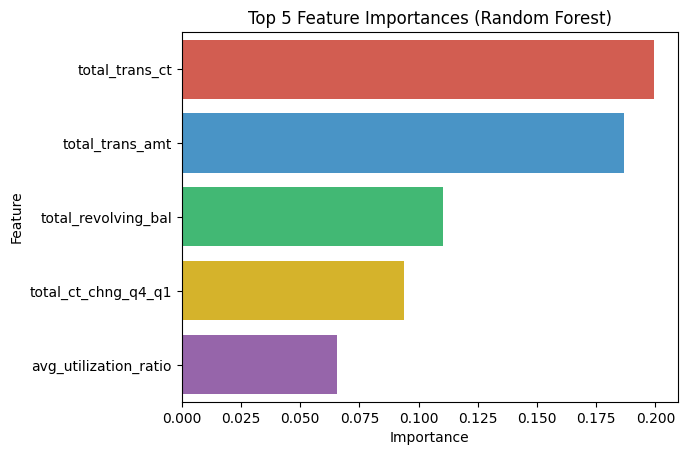

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

importances = rf.feature_importances_
features = X_train.columns

feat_importances = pd.DataFrame({"Feature": features, "Importance": importances})
feat_importances = feat_importances.sort_values(by="Importance", ascending=False)

custom_colors = ["#E74C3C",  # Red
                 "#3498DB",  # Blue
                 "#2ECC71",  # Green
                 "#F1C40F",  # Yellow/Gold
                 "#9B59B6"]  # Purple

sns.barplot(x="Importance", y="Feature", data=feat_importances.head(5), palette = custom_colors)
plt.title("Top 5 Feature Importances (Random Forest)")
plt.savefig("random_forest.png", dpi=300, bbox_inches="tight")
plt.show()

4. **XGBoost**

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1]))  # handle imbalance
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[1682   19]
 [  36  289]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.94      0.89      0.91       325

    accuracy                           0.97      2026
   macro avg       0.96      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



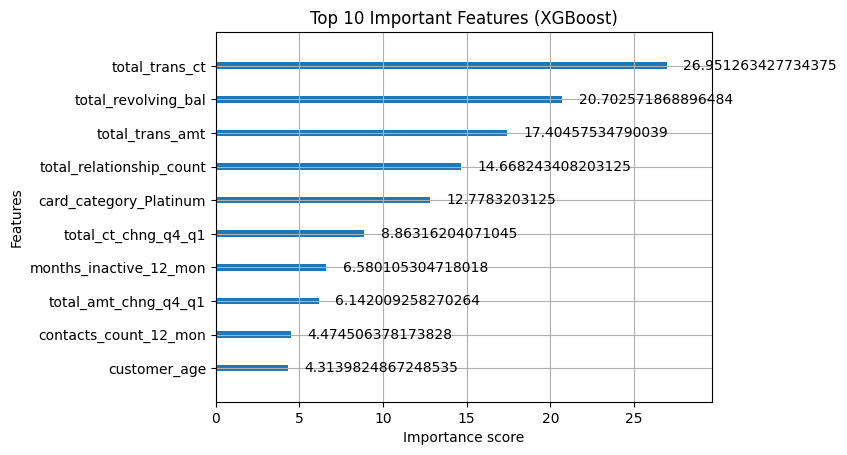

In [21]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model, importance_type='gain', max_num_features=10)  # top 10 features
plt.title("Top 10 Important Features (XGBoost)")
plt.savefig("xgboost.png", dpi=300, bbox_inches="tight")
plt.show()